In [1]:


%load_ext autoreload
%autoreload 2

from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (350, 350)
IPythonConsole.drawOptions.addAtomIndices = True
from openchemie import OpenChemIE
from PIL import Image
import numpy as np
from rdkit.Chem import AllChem
import cv2
import re
import torch
from openchemie import utils



import json
import copy

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = OpenChemIE(device = torch.device('cuda'))

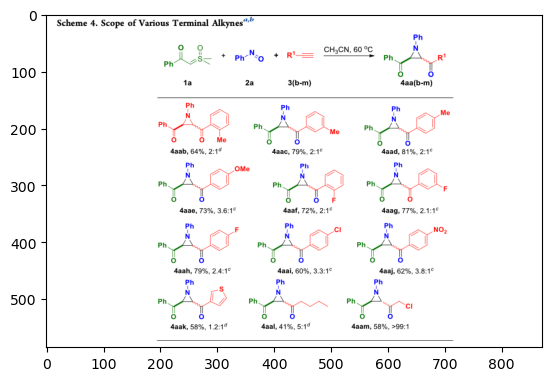

In [3]:
file_name = 'acs.joc.3c00062 example 3.png'

image_file = '../data/' + file_name

image = Image.open(image_file)

image_np = np.array(image)

plt.imshow(image_np)
plt.show()

In [4]:
results = model.extract_reactions_from_figures([image_np])

coref_results = model.extract_molecule_corefs_from_figures([image_np])

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATe

Inspect the RxnScribe Outputs

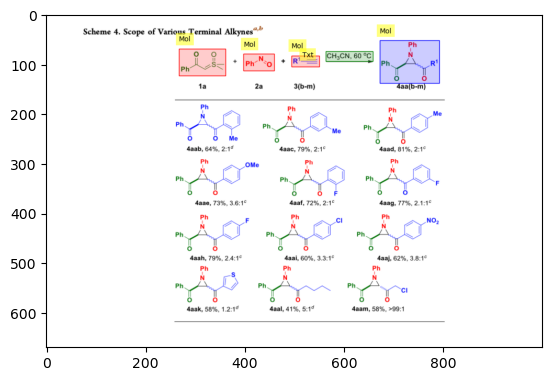

In [5]:
output = model.rxnscribe.draw_predictions(results[0]['reactions'], image_file = image_file)
plt.imshow(output[0])

{'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2ccc(F)cc2)N1c1ccccc1': ['4aah, 79% , 2.4.18'], 'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2ccsc2)N1c1ccccc1': ['4aak, 58% , 1.2:18'], 'COc1ccc(C(=O)[C@@H]2[C@@H](C(=O)c3ccccc3)N2c2ccccc2)cc1': ['73% , 3.6.18', '4aa0,'], 'Cc1ccccc1C(=O)[C@@H]1[C@@H](C(=O)c2ccccc2)N1c1ccccc1': ['4aab, 64% ,', '219'], 'C[SH](C)(=O)/C=C(\\O)c1ccccc1': ['Ia'], 'O=Nc1ccccc1': ['2a'], 'CCCCC(=O)[C@@H]1[C@@H](C(=O)c2ccccc2)N1c1ccccc1': ['4aal, 419%, 5,1d'], 'Cc1cccc(C(=O)[C@@H]2[C@@H](C(=O)c3ccccc3)N2c2ccccc2)c1': ['79%, 2:15', '4aacu'], 'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2ccc(Cl)cc2)N1c1ccccc1': ['4aai, 60% , 3.3.18'], 'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2ccccc2F)N1c1ccccc1': ['4aaf, 729 , 2;18'], 'C#C[Rf]': ['3(b-m)'], 'O=C(CCl)[C@@H]1[C@@H](C(=O)c2ccccc2)N1c1ccccc1': ['4aam, 58%, >99.1'], 'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2ccc([N+](=O)[O-])cc2)N1c1ccccc1': ['4aaj, 62% , 3.8.1c'], 'Cc1ccc(C(=O)[C@@H]2[C@@H](C(=O)c3ccccc3)N2c2ccccc2)cc1': ['4aad, 81', '2:1c', '%,'], 'O=C(c1ccccc1)[C@@H

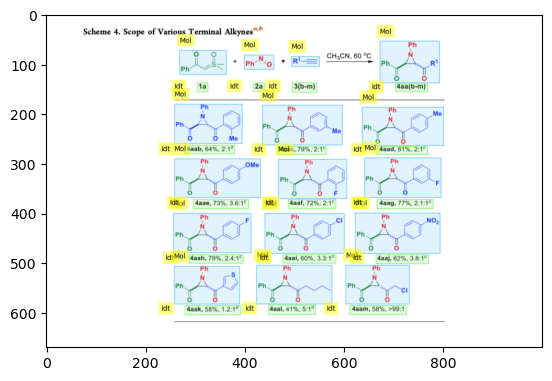

In [6]:
coref_output = model.moldet.draw_bboxes(coref_results[0], image_file = image_file, coref = True)

plt.imshow(coref_output[0])

coref_results_dict = {coref_results[0]['bboxes'][coref[0]]['smiles']: coref_results[0]['bboxes'][coref[1]]['text']  for coref in coref_results[0]['corefs']}

print(coref_results_dict)

C[SH](C)(=O)/C=C(\O)c1ccccc1


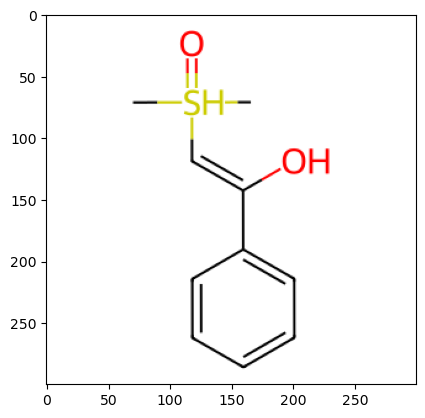

O=Nc1ccccc1


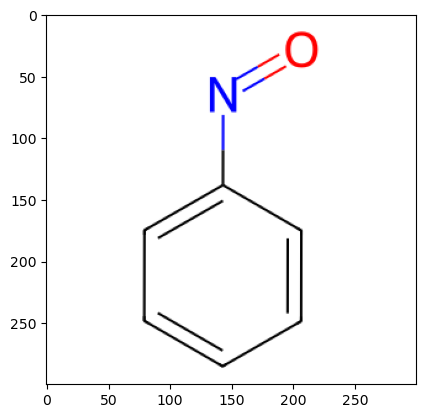

C#C[Rf]


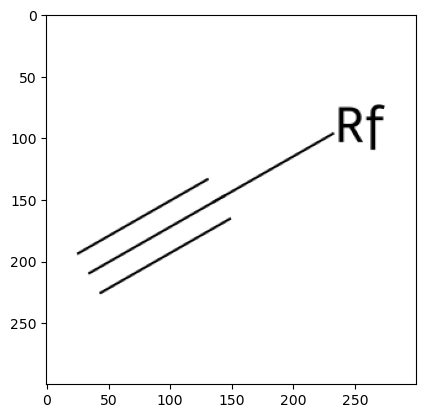

O=C([Rf])[C@@H]1[C@@H](C(=O)c2ccccc2)N1c1ccccc1


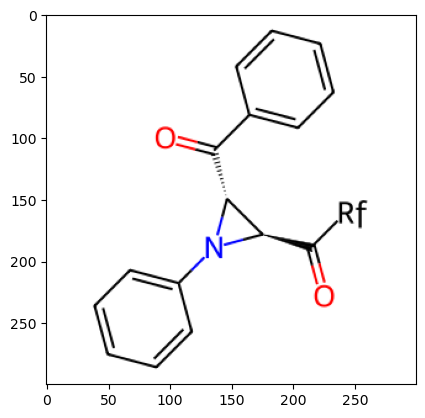

In [6]:
reactants_array = []
products = []

for reactant in results[0]['reactions'][0]['reactants']:
    print(reactant['smiles'])
    reactants_array.append(reactant['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(reactant['smiles']))
    plt.imshow(i)
    plt.show()
for product in results[0]['reactions'][0]['products']:
    print(product['smiles'])
    products.append(product['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(product['smiles']))
    plt.imshow(i)
    plt.show()

backout the reactants and do manual evaluation

In [7]:
backed_out = utils.backout(results, coref_results)

these are the predicted reactants corresponding the product with label 4aah, 79% , 2.4.18
C[SH](C)(=O)/C=C(\O)c1ccccc1


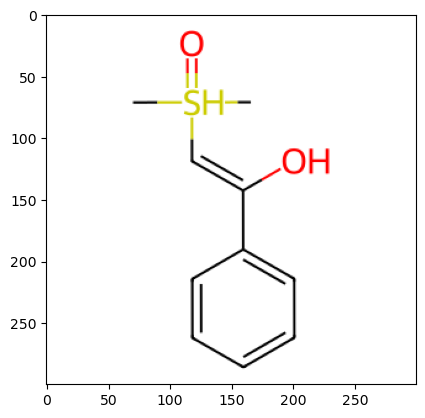

O=Nc1ccccc1


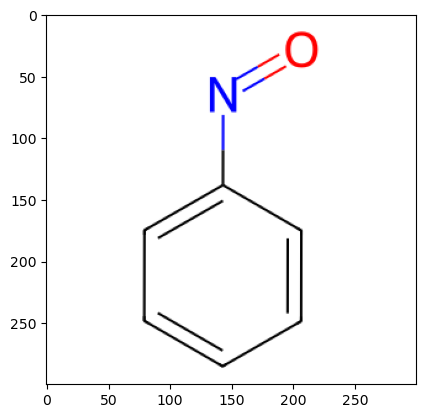

C#Cc1ccc(F)cc1


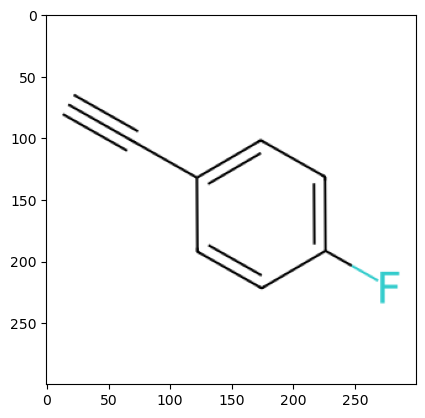

these are the predicted reactants corresponding the product with label 4aak, 58% , 1.2:18
C[SH](C)(=O)/C=C(\O)c1ccccc1


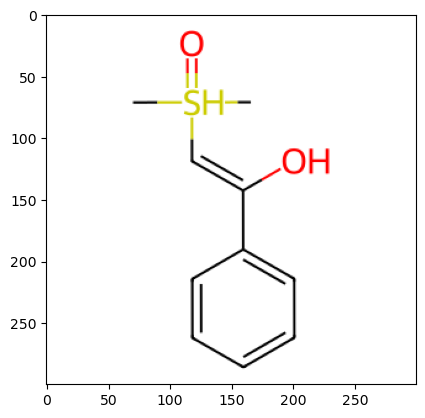

O=Nc1ccccc1


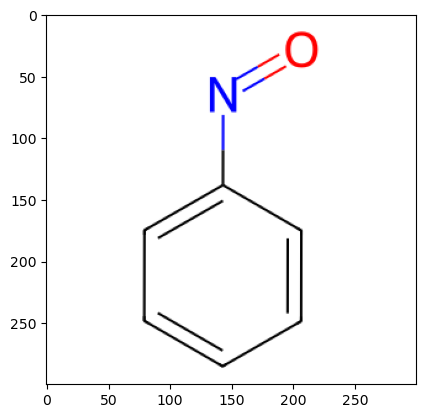

C#Cc1ccsc1


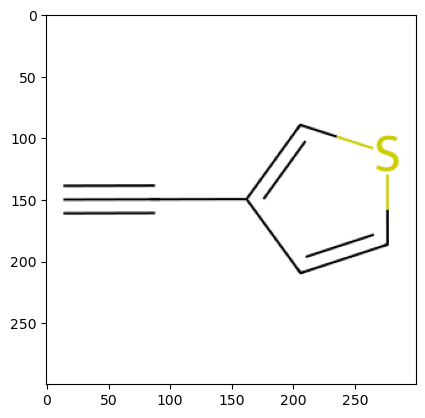

these are the predicted reactants corresponding the product with label 4aa0,
C[SH](C)(=O)/C=C(\O)c1ccccc1


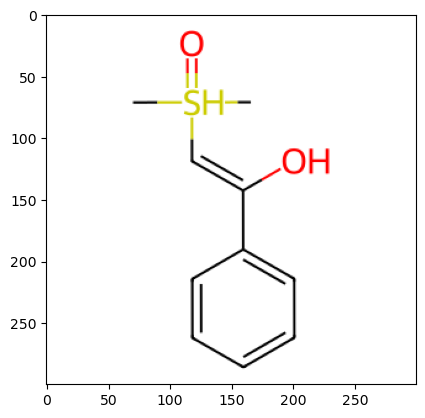

O=Nc1ccccc1


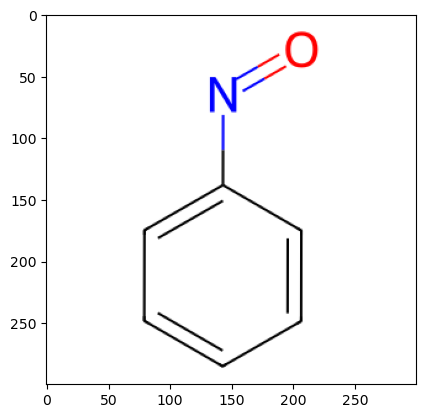

C#Cc1ccc(OC)cc1


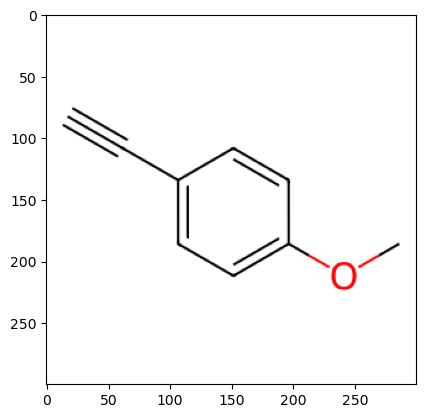

these are the predicted reactants corresponding the product with label 4aab, 64% ,
C[SH](C)(=O)/C=C(\O)c1ccccc1


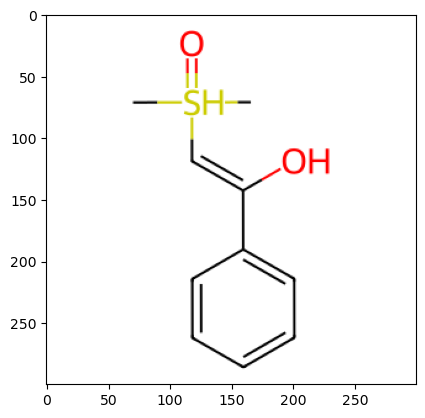

O=Nc1ccccc1


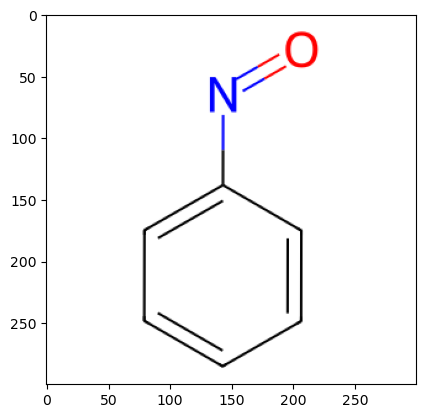

C#Cc1ccccc1C


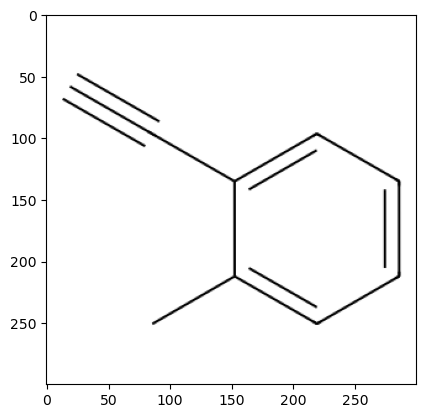

these are the predicted reactants corresponding the product with label 4aal, 419%, 5,1d
C[SH](C)(=O)/C=C(\O)c1ccccc1


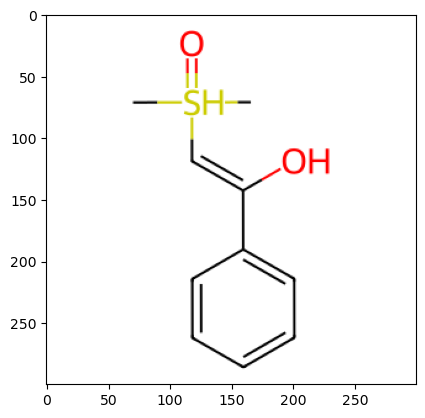

O=Nc1ccccc1


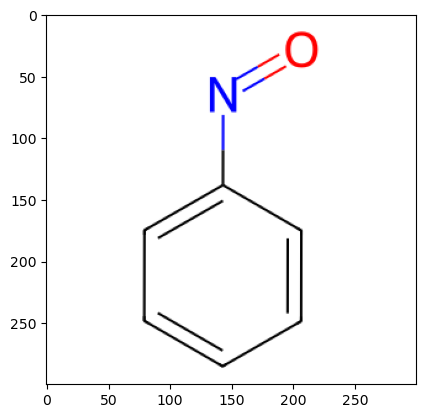

C#CCCCC


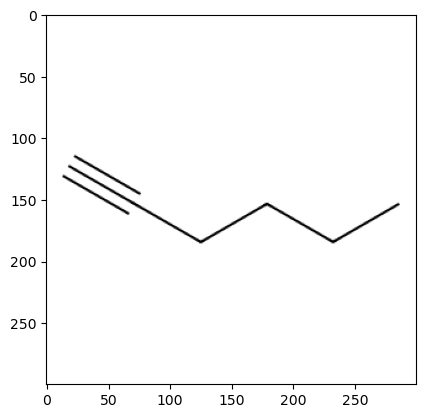

these are the predicted reactants corresponding the product with label 4aacu
C[SH](C)(=O)/C=C(\O)c1ccccc1


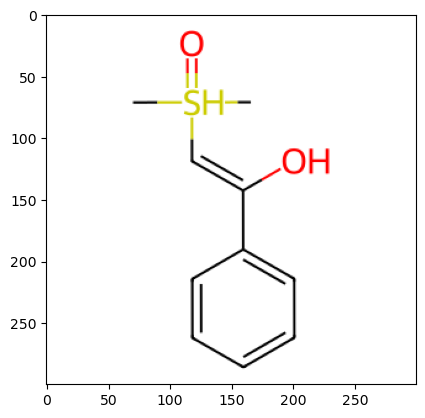

O=Nc1ccccc1


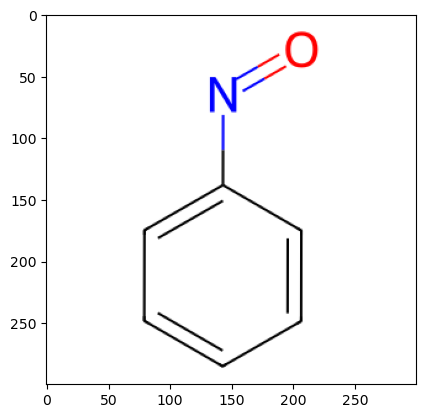

C#Cc1cccc(C)c1


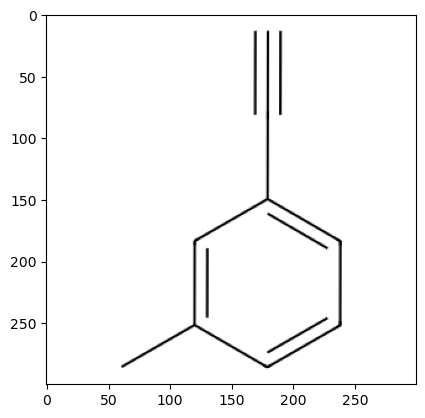

these are the predicted reactants corresponding the product with label 4aai, 60% , 3.3.18
C[SH](C)(=O)/C=C(\O)c1ccccc1


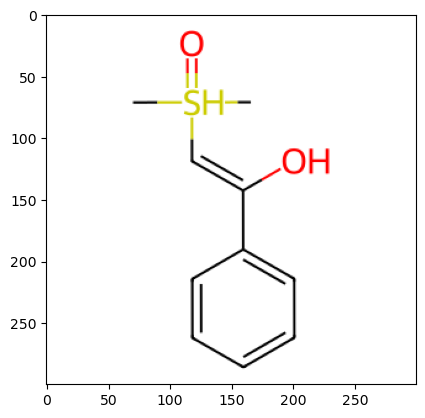

O=Nc1ccccc1


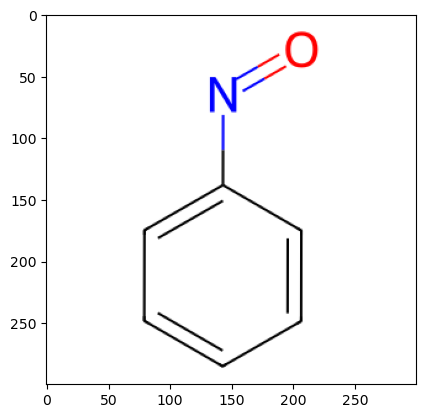

C#Cc1ccc(Cl)cc1


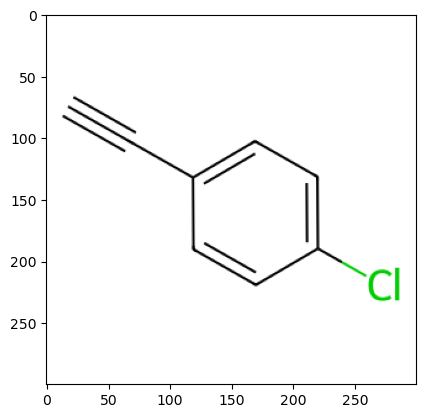

these are the predicted reactants corresponding the product with label 4aaf, 729 , 2;18
C[SH](C)(=O)/C=C(\O)c1ccccc1


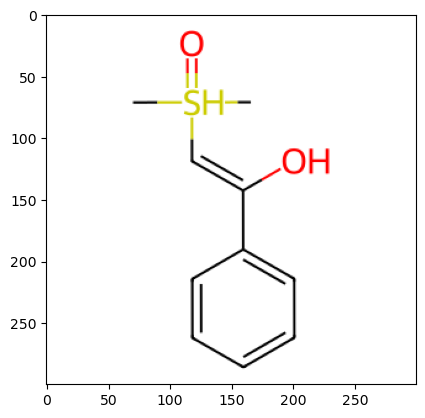

O=Nc1ccccc1


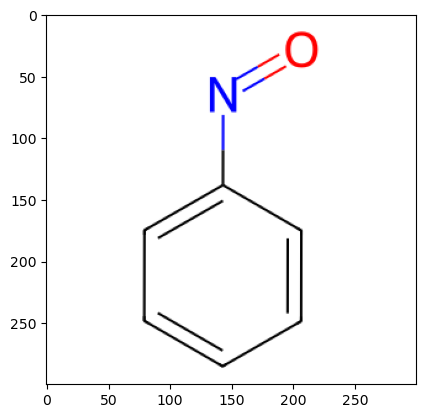

C#Cc1ccccc1F


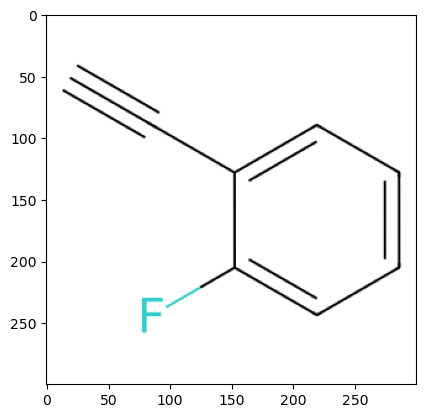

these are the predicted reactants corresponding the product with label 4aam, 58%, >99.1
C[SH](C)(=O)/C=C(\O)c1ccccc1


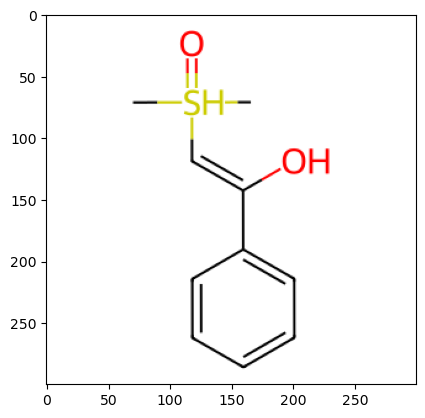

O=Nc1ccccc1


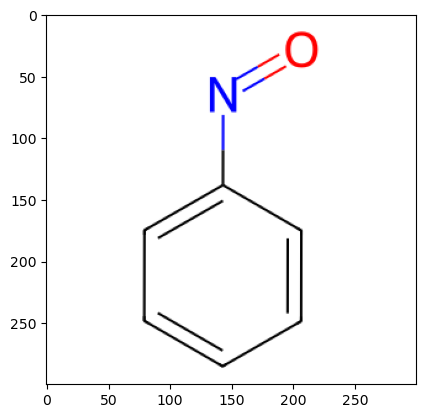

C#CCCl


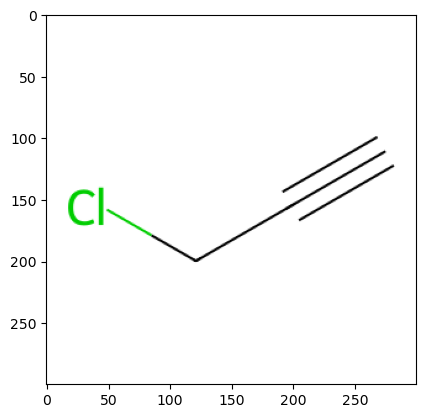

these are the predicted reactants corresponding the product with label 4aaj, 62% , 3.8.1c
C[SH](C)(=O)/C=C(\O)c1ccccc1


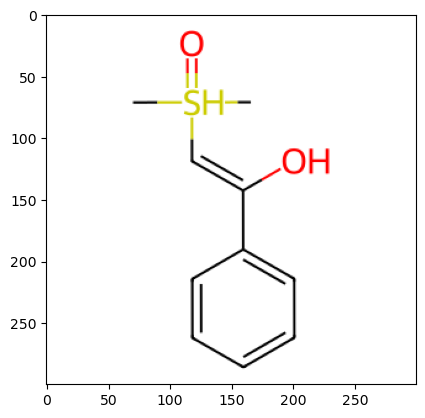

O=Nc1ccccc1


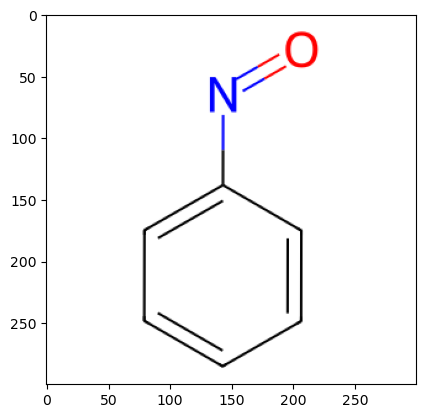

C#Cc1ccc([N+](=O)[O-])cc1


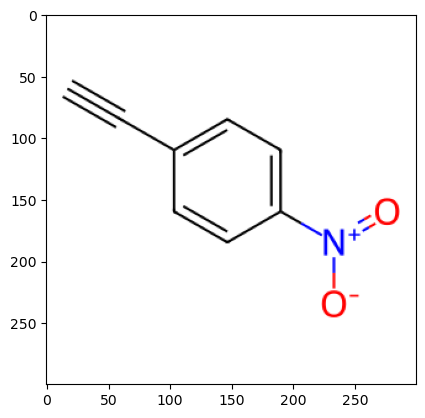

these are the predicted reactants corresponding the product with label 4aad, 81
C[SH](C)(=O)/C=C(\O)c1ccccc1


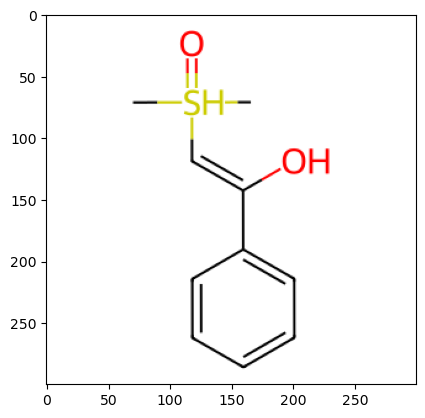

O=Nc1ccccc1


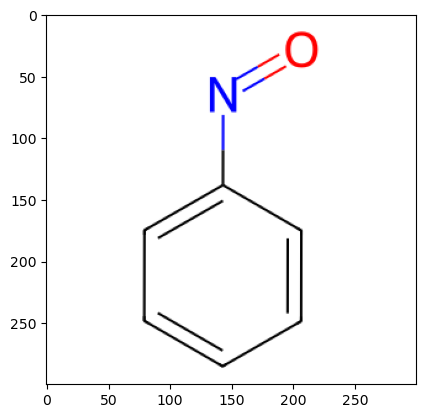

C#Cc1ccc(C)cc1


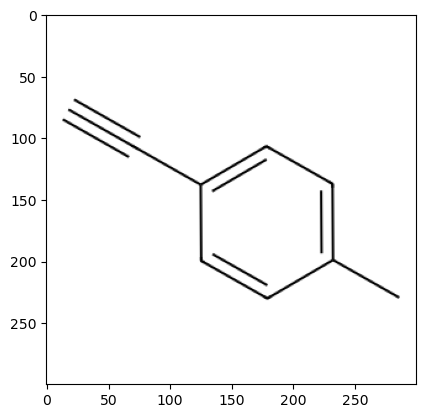

these are the predicted reactants corresponding the product with label 4aag,
C[SH](C)(=O)/C=C(\O)c1ccccc1


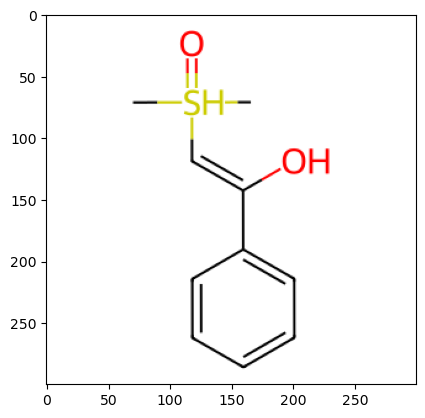

O=Nc1ccccc1


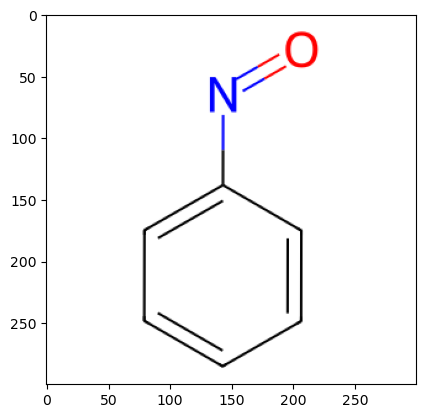

C#Cc1cccc(F)c1


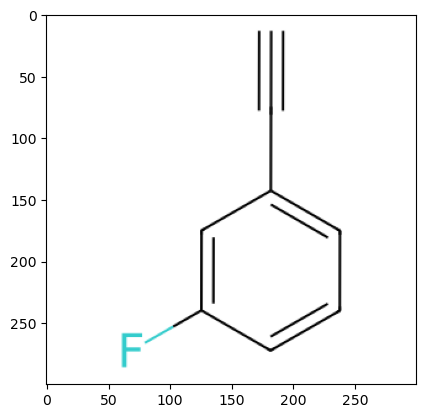

these are the predicted reactants corresponding the product with label 4aa(b-m)
C[SH](C)(=O)/C=C(\O)c1ccccc1


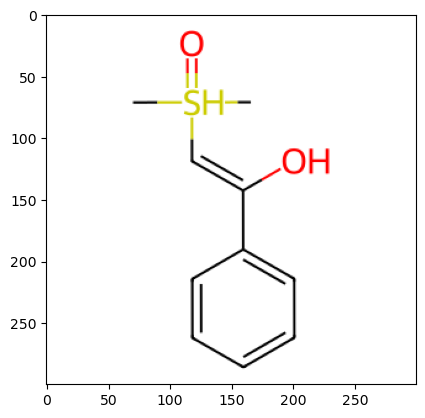

O=Nc1ccccc1


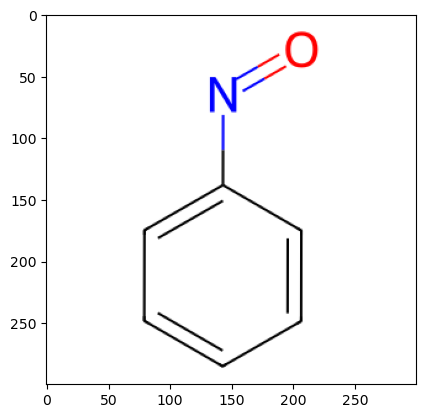

C#C[Rf]


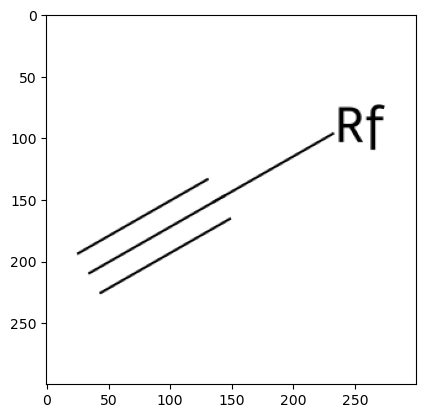

In [8]:
extracted_reactants = {}

for reactants,  _, label in backed_out:
    print(f'these are the predicted reactants corresponding the product with label {label}')
    extracted_reactants[label] = []
    for molecule in reactants:
        print(molecule)
        extracted_reactants[label].append(molecule)
        i = Draw.MolToImage(Chem.MolFromSmiles(molecule))
        plt.imshow(i)
        plt.show()

backout results:

molscribe for reactants wrong, but not for the relevant reactant

4b yes
4c yes
4d yes
4e ocr parsed as 0
4f yes
4g yes
4h yes
4i yes
4j yes
4k yes
4l yes
4m yes

precision 11/12 recall 11/13